<a href="https://colab.research.google.com/github/himawanAd/Analisis-Sentimen-Tweet-Mandalika/blob/update/Project_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project NLP**
**Analisis Sentimen Komentar Masyarakat terhadap Sirkuit Mandalika pada Media Sosial Twitter**

## Tweet Crawling
Crawling data Twitter menggunakan library Twint

In [1]:
!pip install --upgrade git+https://github.com/kevctae/twint.git
!pip install whatthelang
!pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-yxxymgrl
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-yxxymgrl
     |████████████████████████████████| 263 kB 18.3 MB/s 
     |████████████████████████████████| 385 kB 55.7 MB/s 
     |████████████████████████████████| 288 kB 34.1 MB/s 
     |████████████████████████████████| 49 kB 3.4 MB/s 
     |████████████████████████████████| 59 kB 3.5 MB/s 
     |████████████████████████████████| 140 kB 44.6 MB/s 
     |████████████████████████████████| 62 kB 626 kB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=39179 sha256=f9fa4f7e80da434a3ede5f9abc7037c47b2941f3476fe2ac969ddbe99b89d5d1
  Stored in directory: /tmp/pip-ephem-wheel-cache-axhcwloi/wheels/37/b7/73/3f444bfba5ddc96a71f205dd9a8361f1336e2b8376ea8fefed
  Created wheel for googletransx: filename=googletra

In [2]:
# Import Library
import twint
import nest_asyncio
# Additional library for get rids of some errors
nest_asyncio.apply()

In [ ]:
# Instantiate and configure the twint-object
c = twint.Config()
c.Store_object = True
c.Pandas = True
c.Search = "Mandalika"
c.Since = '2020-03-02'
c.Until = '2022-03-21'
c.Lang = "id"
c.Limit = 3000

# Run Search
twint.run.Search(c)

In [4]:
# Cleanup
tweets = twint.storage.panda.Tweets_df.drop_duplicates(subset=['id'])
# Reindex
tweets.index = range(len(tweets))
# Remove non-Indonesian
from whatthelang import WhatTheLang
wtl = WhatTheLang()

# This function makes easy to handle exceptions (e.g. no text where text should be)
# Not really needed but can be useful
def detect_lang(text):
  try:
    return wtl.predict_lang(text)
  except Exception:
    return 'exp'

# Added performance measure here
tweets['lang'] = tweets['tweet'].map(lambda t: detect_lang(t))
# Keep only Indonesian
tweets = tweets[tweets.lang == 'id']

# Exporting
# tweets.to_json('dataset.json')
tweets.to_csv('dataset.csv')

# Drop unused Columns
data = tweets
data.drop(['conversation_id','created_at','timezone','place','language','hashtags','cashtags','user_id','user_id_str','day','hour','link','urls','photos','video','thumbnail','retweet','nlikes','nreplies','nretweets','quote_url','search','near','geo','source','user_rt_id','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest','lang','name','id'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Sampling

In [5]:
number_of_sample = 700
sample = data.sample(n=number_of_sample, random_state=2020)
sample.to_csv('sample.csv')

## Preprocessing Data

In [6]:
# Import Library
!pip install sastrawi
!pip install nltk

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk, re, string
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# Create Sastrawi Stemmer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 25.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Stemmer

In [7]:
# Create Sastrawi Stemmer
stemmer = StemmerFactory().create_stemmer()

### Stopwords

In [9]:
# Create Stopword
with open("Stopword.txt", "r") as f:
  stop_words = f.readline()
  stop_words = stop_words.split()

### Preprocessing Function

In [18]:
def preprocessor(text):
  # Convert to lower case
  text = text.lower()
  # Remove additional code
  text = text.replace("\\xe2\\x80\\xa6", "")
  # Convert www.* or https?://* to URL
  text = re.sub("((www\.[^\s]+)|(https?://[^\s]+))", "", text)
  # Convert @username to AT_USER
  text = re.sub("@[^\s]+", "", text)
  # Remove additional white spaces
  text = re.sub("[\s]+", " ", text)
  # Replace #word with word
  text = re.sub(r"#([^\s]+)", r"\1", text)
  #text = re.sub(r"#([^\s]+)", "", text)
  # Remove number from text
  text = re.sub(r"\d+", "", text)
  # Replace punctuation with space
  text = text.translate(str.maketrans(string.punctuation, " " * len(string.punctuation)))
  return text

data["tweet_clean"] = data["tweet"].apply(lambda x: preprocessor(x))
data = data.drop_duplicates()
data.sample(n=3)

,date,tweet,username,tweet_clean
2267,2022-03-20 15:42:22,..kadrun menghina pawang tolak hujan. padahal ...,riffirifzaldi,kadrun menghina pawang tolak hujan padahal ...
2996,2022-03-20 14:45:40,@kemalpalevi ga rugi saya streaming...hujannya...,weeleemovick,ga rugi saya streaming hujannya jd berhenti...
741,2022-03-20 20:44:25,@ABSetyono @PlateJohnny @Dennysiregar7 @kemkom...,delArdian_,menkominfo johnny g plate dijadwalkan akan l...


### Tokenizer

In [19]:
def tokenizer(text):
  words = word_tokenize(text)
  tokens = []
  for w in words:
      # add tokens
      if len(w) > 3 and w not in stop_words:
          w = stemmer.stem(w)
          tokens.append(w.lower())
  return " ".join(tokens)

data['tweet_clean'] = data['tweet_clean'].apply(lambda x : tokenizer(x))
data = data.drop_duplicates()
data.to_csv('clean_dataset.csv')
data.sample(n=3)

,date,tweet,username,tweet_clean
2994,2022-03-20 14:45:43,Doa orang2 baik mengalahkan doa orang2 yang ga...,txtdrindonesia,orang baik kalah orang yang suka motogp mandal...
400,2022-03-20 23:00:00,Pembangunan infrastruktur telekomunikasi dalam...,BaharSarmila,bangun infrastruktur telekomunikasi dalam gela...
2936,2022-03-20 14:49:28,@xdarkozz @coffeesweetened @DwiPrasetyaSan1 @b...,bryyyyyyyyyyyyz,bohong messi mandalika buat nonton marquez


## Text Vectorization

In [20]:
# Import Library
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Defining Vectorizer Object
vectorizer_tfidf = TfidfVectorizer(max_features=1000)

In [22]:
# fit and transform text data
word_tfidf = vectorizer_tfidf.fit_transform(data["tweet_clean"].values)
word_tfidf

<1933x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 23179 stored elements in Compressed Sparse Row format>

In [23]:
# Get feature name / words in data
feature_name = vectorizer_tfidf.get_feature_names_out()

# Data dimensions
dimensions = word_tfidf.get_shape()
print(f"tweet_clean  = {dimensions[0]}")
print(f"max_features = {dimensions[1]}")

tweet_clean  = 1933
max_features = 1000


### Check the word with highest TF-IDF value

In [24]:
content1, content2 = [], []

for n in range(dimensions[0]):
    # Convert sparse matrix row by row
    row = word_tfidf.getrow(n).toarray()[0].ravel()
    # Get top values and its indexes
    top_ten_indices = row.argsort()[-1]
    top_ten_values = row[row.argsort()[-1]]
    # Identify the highest TFIDF value and word #
    highestTFIDFword = feature_name[top_ten_indices]
    highestTFIDFvalue = top_ten_values
    top1word = {
        "nomor tweet": n + 1,
        "nilai TFIDF": highestTFIDFvalue,
        "top word": highestTFIDFword,
    }
    content1.append(top1word)
    content2.append(highestTFIDFword)

# Hitung Frekuiensi kata dengan bobot terbesar
content2 = np.asarray(content2)
words, n = np.unique(content2, return_counts=True)

# Convert to DataFrame lalu urutkan secara descending
# lalu pilih 20 kata dengan frekuensi terbesar
words_data = (
    pd.DataFrame({"Kata": words, "Banyak": n}).sort_values(by="Banyak", ascending=False).head(20)
)
words_data

,Kata,Banyak
280,jadilebihbaik,71
716,terimakasihbumnmandalika,15
706,telkomselmandalika,15
266,infrastruktur,12
434,masyarakat,12
273,internet,11
203,gara,9
57,balap,9
515,orang,9
255,hujan,8


### Result Visualization

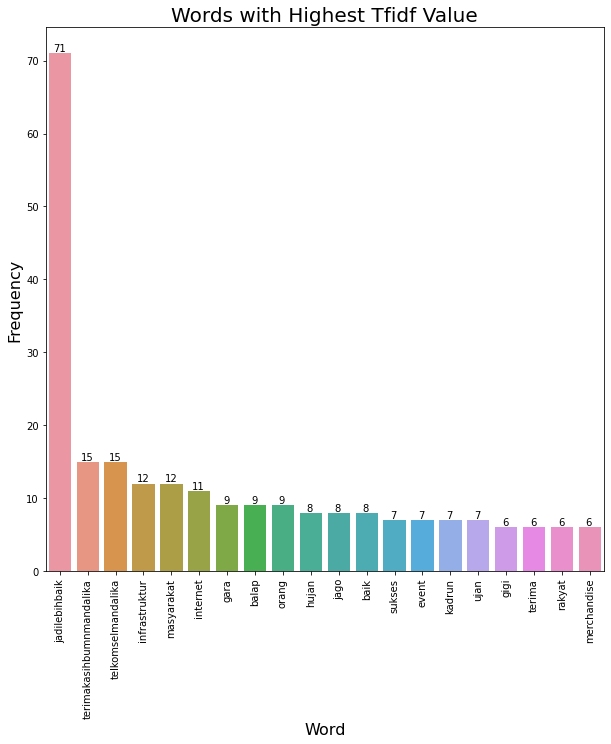

In [25]:
# Plotting Barplot
plt.figure(figsize=(10, 10))
sns.barplot(x=words_data["Kata"], y=words_data["Banyak"])
for i, v in enumerate(words_data["Banyak"].tolist()):
    plt.text(i - len(str(v)) / 10 - 0.05, v+0.25, str(v), fontsize=10)
plt.title("Words with Highest Tfidf Value", fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Word", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

## Modeling

### Loading Labelled Sample Tweet

In [29]:
# Converting xls to csv
sample = pd.read_excel ("labeling.xlsx")
sample.to_csv ("labeling.csv", index = None, header = True)
#Loading Sample
sample = pd.read_csv("labeling.csv")
sample.head()

,Unnamed: 0,date,tweet,username,sentiment
0,1001,2022-03-20 18:34:00,"@idextratime @HRC_MotoGP jauh2 ke mandalika, d...",sendalpiraun,1
1,1004,2022-03-20 18:32:57,"Nah, Lantas apa hubungannya sama hal klenik y...",JustYourNda,1
2,1006,2022-03-20 18:32:56,TMC sudah beroperasi sejak 18-20 Maret lantara...,JustYourNda,2
3,1007,2022-03-20 18:32:53,Terbukti dari konsentrasi hujan pada 18 dan 19...,JustYourNda,0
4,1012,2022-03-20 18:31:46,congratulations to the riders ??? #IndonesianG...,gataugaliat_,1


### Preprocess Sampling Dataset

In [30]:
sample["tweet_clean"] = sample["tweet"].apply(lambda x:preprocessor(x))
sample["tweet_clean"] = sample["tweet"].apply(lambda x:tokenizer(x))
sample["tweet_clean"].sample(n=5)

269    baru apdet gelar moto tadi mandalika ujan dere...
323    tiba tiba pikir waktu balap pada balap mandali...
16     aniesbaswedan motogp dateng hujan derasss jela...
311    motogp yaaa anggep hibur kalo ujan deres gada ...
99     ketawa pawang hujan mandalika padahal sendiri ...
Name: tweet_clean, dtype: object

### Fitting Model

In [47]:
x = vectorizer_tfidf.transform(sample["tweet_clean"].values)
y = sample["sentiment"].values

#Splitting Data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0)

#modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

classifiers = {
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=0),
    "Logistic Regression": LogisticRegression(random_state=0),
    "Random Forest Classifier": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(kernel="linear", probability=True, random_state=0),
}

for name in classifiers.keys():
  classifiers[name].fit(x_train, y_train)
  y_pred = classifiers[name].predict(x_valid)
  print(f"{name} Accuracy: ", metrics.accuracy_score(y_valid, y_pred))

Decision Tree Classifier Accuracy:  0.5357142857142857
Logistic Regression Accuracy:  0.55
Random Forest Classifier Accuracy:  0.5785714285714286
Support Vector Machine Accuracy:  0.5928571428571429


## Prediction

In [48]:
# Decision Tree Classifier
data["DTC_prediction"] = classifiers["Decision Tree Classifier"].predict(word_tfidf)
# Logistic Regression
data["LR_prediction"] = classifiers["Logistic Regression"].predict(word_tfidf)
# Random Forest Classifier
data["RFC_prediction"] = classifiers["Random Forest Classifier"].predict(word_tfidf)
# Support Vector Machine
data["SVM_prediction"] = classifiers["Support Vector Machine"].predict(word_tfidf)
data.sample(n=5)

,date,tweet,username,tweet_clean,prediction,DTC_prediction,LR_prediction,RFC_prediction,SVM_prediction
855,2022-03-20 19:39:49,@Telkomsel MotoGP yang saya dukung di MotoGP M...,riska1798,motogp yang saya dukung motogp mandalika adala...,0,0,0,0,0
2492,2022-03-20 15:22:50,Oh ini yang lagi rame Pawang Hujan Mandalika 😁...,Yunus_portrait,yang lagi rame pawang hujan mandalika dorna in...,0,0,0,0,0
670,2022-03-20 21:23:09,@Tan_Mar3M Kesian banget... Sedih yaa MotoGP s...,masgung1973,kesi banget sedih motogp sukses pihak prinsipa...,1,1,1,1,1
1582,2022-03-20 16:49:07,@Candraasmara85 Sesungguhnya cebong dan nyale ...,e_class_1999,sungguh cebong nyale pantai mandalika saudara,0,0,0,0,0
2829,2022-03-20 14:56:01,Isi sosmed saat ini saat bahas #IndonesianGP :...,makerandreas,sosmed saat saat bahas indonesiangp bahas marc...,0,2,2,2,2


## Visualization

### Decision Tree Classifier

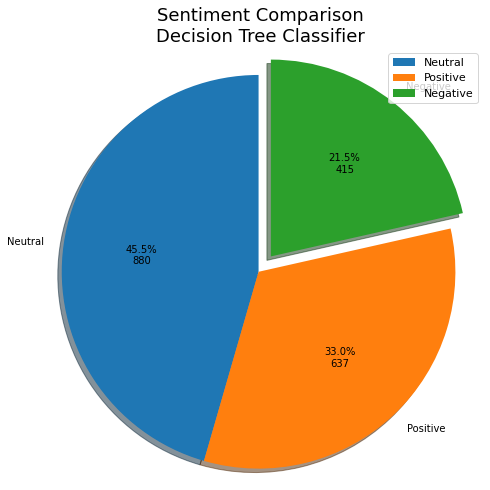

In [50]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet_clean"].groupby(data["DTC_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Neutral", "Positive", "Negative"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Sentiment Comparison\nDecision Tree Classifier", fontsize=18)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()

### Logistic Regression

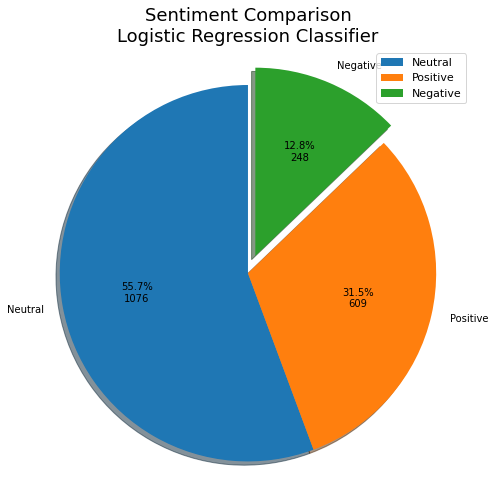

In [51]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet_clean"].groupby(data["LR_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Neutral", "Positive", "Negative"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Sentiment Comparison\nLogistic Regression Classifier", fontsize=18)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()

### Random Forest Classifier

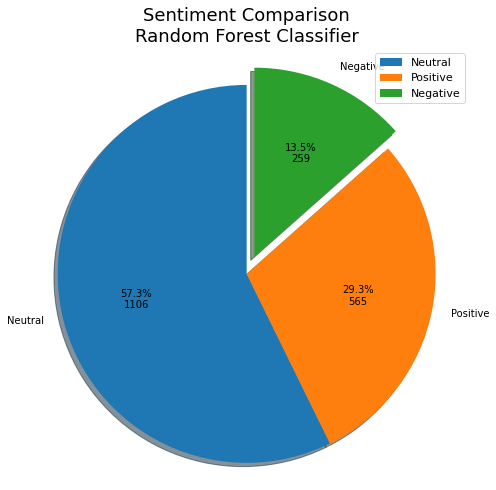

In [52]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet_clean"].groupby(data["RFC_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Neutral", "Positive", "Negative"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Sentiment Comparison\nRandom Forest Classifier", fontsize=18)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()

### Support Vector Machine

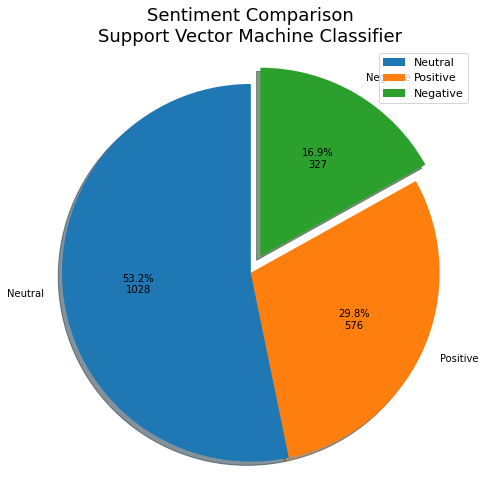

In [53]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet_clean"].groupby(data["SVM_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Neutral", "Positive", "Negative"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Sentiment Comparison\nSupport Vector Machine Classifier", fontsize=18)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()